# Midterm Exam (part 2) - Computational Physics I

### Date: Friday 18 October 2024
### Credits: 10 points

### Duration: 1 hour 15 minutes

## Name: Alan Palma Travez

### Instructions:

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The exam is individual. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems:

## 5. Image processing: identifying sunspots (10 points) 

The purpose of this problem is to isolate and image a sunspot, and then calculate its size.

Sunspots are **dark spots on the Sun's surface that are cooler than the surrounding (brighter) areas due to intense magnetic activity**. They often appear in groups and are indicators of high Solar activity (called Solar maxima, which refer to the periods of peak solar activity during the Sun's 11-year solar cycle). We are currently within a Solar maxima period, which is expected to peak in July 2025. During such periods, sunspots, solar flares, and other solar phenomena are frequent.

### SDO sunspot data: 

The Solar Dynamics Observatory (SDO), launched by NASA in 2010, continuously monitors the Sun, capturing high-resolution images of its atmosphere. Its Atmospheric Imaging Assembly (AIA) provides data in multiple wavelengths, allowing us to study Solar dynamics and sunspot formation. Today's Sun images can be found here: https://suntoday.lmsal.com/suntoday/?suntoday_date=2024-10-18).

Please download the SDO data from: https://github.com/wbandabarragan/physics-teaching-data/tree/main/2D-data/f1700.fits

This file has an image of the Sun at a wavelength of $1700\,\rm Å$, which observes the lower photosphere (i.e. the visible surface of the Sun). It shows the cooler layers of the Sun at temperatures of $5000-6000\,\rm K$). It also highlights bright regions associated with magnetic activity and sunspots, so it is ideal for this exercise.

### Tasks:

(a) Open the FITS file and inspect its content and structure. You should see a header and the data.

(b) Create an I/O python function that reads in the filename and returns the header and the data as objects in a tuple.

(c) Call your I/O function, store the header and data objects, and make a high-quality figure showing the image of the Sun with a colour bar in linear scale. For optimal sunspot visualisation, you will need to fix the limits of the colour bar and choose an adequate colour palette. How many sunspots can you visually spot?

(d) Now you need to isolate a single sunspot. Select one target sunspot and use indexing to zoom into it. Make a high-quality figure showing the subset (zoomed-in) image of the Sun, containing your target sunspot.

(e) Make a 1D histogram of pixel intensity within the subset (zoomed-in) image. Do the sunspots have low or high intensities?

(f) Create a python function that isolates the area covered by the sunspot. Your function should read the subset image and return a cleaned binary image array with ones in the sunspot and zeroes outside.

(g) Call your function and make a high-quality figure showing the binary image of the sunspot with an appropriate colour bar.

(h) Using your binary image, calculate the total area in pixel units covered by the sunspot, and estimate the sunspot radius also in pixel units assuming that its area is circular, i.e. $A_{\rm sunspot}=\pi\,r_{\rm sunspot}^2$.

(i) Now you need to calculate the sunspot radius in physical units ($\rm km$). To do this, you first need to read from the FITS file the header information on the angular size of a pixel in the image (called "CDELT1" in units of $\rm arcsec$). Use the header object returned in (c) and isolate the value of "CDELT1" from it. Then, convert it to a physical size (in $\rm km$) using the Earth-Sun distance of $1.496\times 10^8\,\rm km$ and trigonometry.

(j) Use the calculated value of "CDELT1" (in $\rm km$) to estimate the sunspot radius in $\rm km$. Based on your results, are sunspots larger or smaller than the Earth? For reference, the Earth radius is $6.37\times 10^3\,\rm km$.

(a) Open the FITS file and inspect its content and structure. You should see a header and the data

In [169]:
#Third party libraries 

# Libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits 

In [170]:
#define the path 

path = "f1700.fits"

#Extract the data and keys
data_fits= fits.open(path)
data = data_fits[1].data
keys = data_fits[1].header.keys

#print(data.shape, keys)
print(np.min(data), np.max(data))

-8.0 6733.0


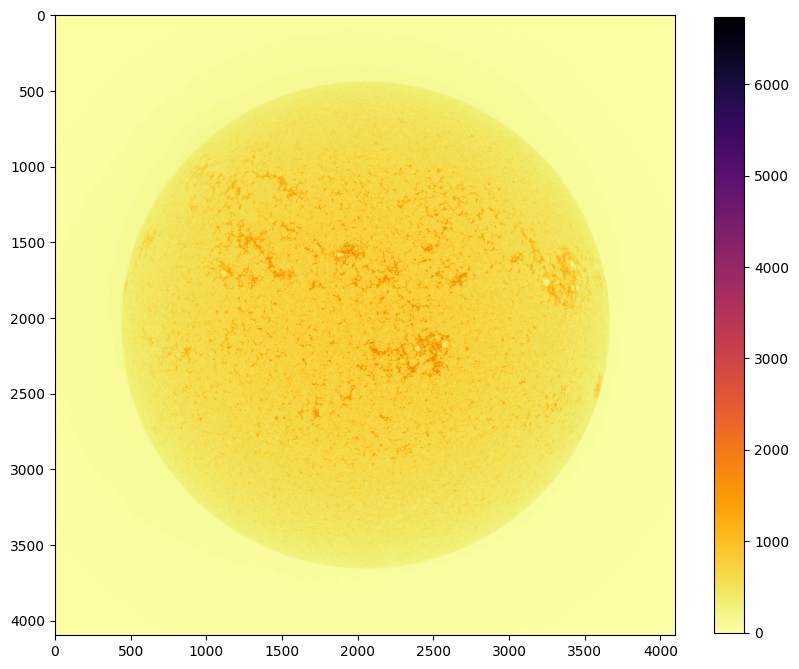

In [171]:
#PLoting to see 

plt.figure(figsize=(10, 10))

fig = plt.imshow(data,  cmap = "inferno_r")

plt.colorbar(fig, shrink = 0.8)
plt.show()

(b) Create an I/O python function that reads in the filename and returns the header and the data as objects in a tuple.

In [172]:
def io_extract_fit(path): 
    """
    Function open a fits file and get the data and headers
    Inputs: 
        path: file path (str)
    Output: 
        data: data array storing the image (2D) (float)
        header: header of the fits file
    """
    data_fits= fits.open(path)
    
    #Extract the data and keys
    data = data_fits[1].data
    header = data_fits[1].header

    return np.array(data), header

(c) Call your I/O function, store the header and data objects, and make a high-quality figure showing the image of the Sun with a colour bar in linear scale. For optimal sunspot visualisation, you will need to fix the limits of the colour bar and choose an adequate colour palette. How many sunspots can you visually spot?

In [173]:
#Call the function
img, header = io_extract_fit(path)

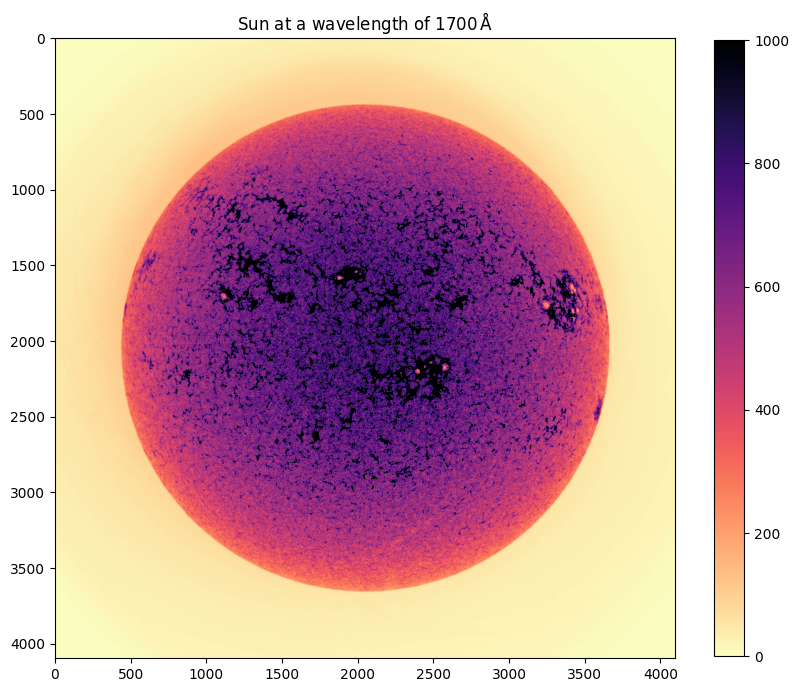

In [174]:
#Ploting to see and put limits 

plt.figure(figsize=(10, 10))

fig = plt.imshow(img,  cmap = "magma_r", vmin = 0.0, vmax = 1000.)

plt.title(r"Sun at a wavelength of $1700\,\rm Å$")
plt.colorbar(fig, shrink = 0.8)
plt.show()

(d) Now you need to isolate a single sunspot. Select one target sunspot and use indexing to zoom into it. Make a high-quality figure showing the subset (zoomed-in) image of the Sun, containing your target sunspot.

In [175]:
print(img.shape)

(4096, 4096)


In [176]:
#Isolate using indexing

img_isolate = img[1650:1750, 1050:1170]

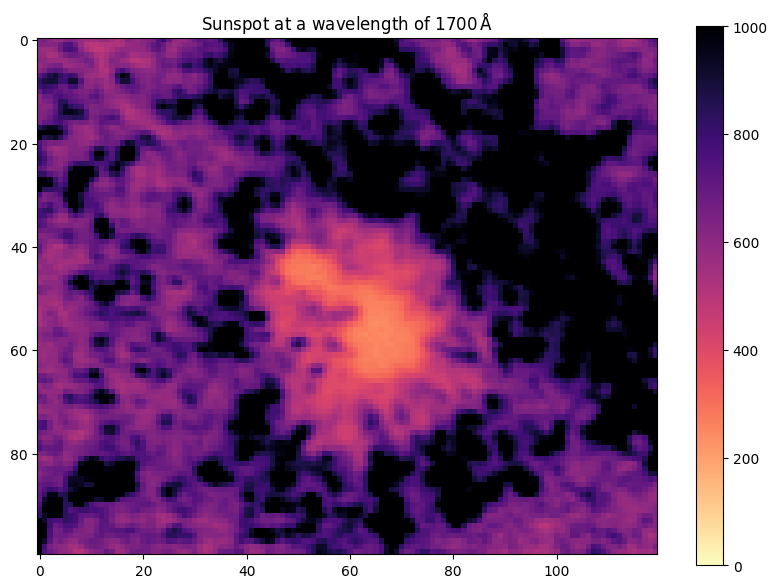

In [177]:
#Ploting to see and put limits 

plt.figure(figsize=(10, 10))

fig = plt.imshow(img_isolate,  cmap = "magma_r", vmin = 0.0, vmax = 1000.)

plt.title(r"Sunspot at a wavelength of $1700\,\rm Å$")
plt.colorbar(fig, shrink = 0.7)
plt.show()

(e) Make a 1D histogram of pixel intensity within the subset (zoomed-in) image. Do the sunspots have low or high intensities?

In [178]:
#Flatten the image to maek a histogram

img_subset_1d = img_isolate.flatten()

print(img_subset_1d.shape)

(12000,)


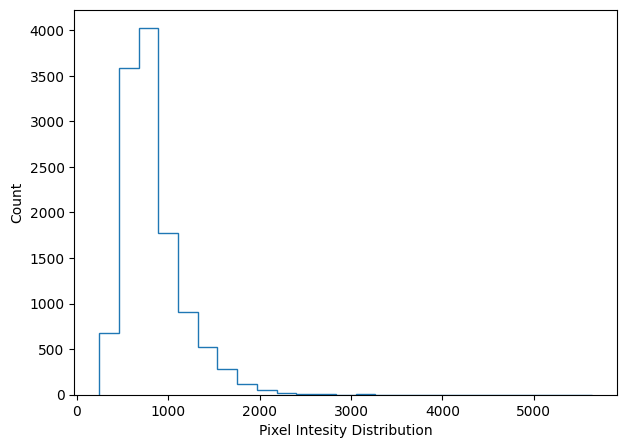

In [179]:
#Plot a histogram to identify the threshold value

plt.figure(figsize=(7,5))

plt.hist(img_subset_1d, bins=25, histtype="step")

plt.xlabel("Pixel Intesity Distribution")
plt.ylabel("Count")
plt.show()

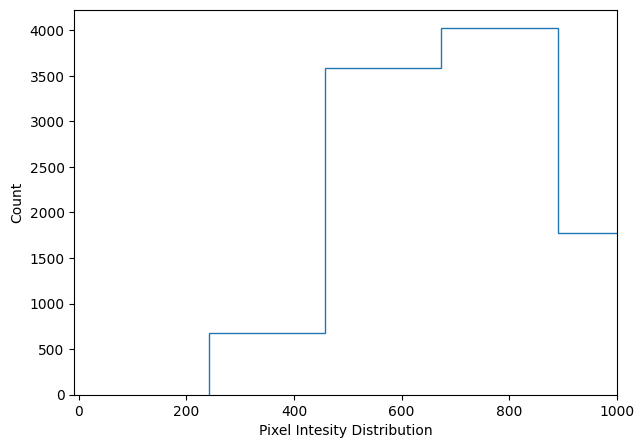

In [180]:
#Plot a histogram to identify the threshold value

plt.figure(figsize=(7,5))

plt.hist(img_subset_1d, bins=25, histtype="step")

plt.xlim(-8., 1000.)
plt.xlabel("Pixel Intesity Distribution")
plt.ylabel("Count")
plt.show()

The sunspots has low intesities

(f) Create a python function that isolates the area covered by the sunspot. Your function should read the subset image and return a cleaned binary image array with ones in the sunspot and zeroes outside.


In [181]:
def bin_clean_img(img_org, th_value):
    """
    Function to isolate the sunspot and get a binary image
    Inputs: 
        img_org: 2d image of an isolated sunspot (float)
        th_value: threshold valur to isolate the sunspot and get a binary image (float)
    Output:
        clean_image1_2d: 2d binary image with the isolated sunspot
    """
    #Flatten the image
    img = img_org.flatten()

    #Clean the image using a threshold value
    clean_image1_1d = np.where(img < th_value, 1, 0)

    #Resize the image
    clean_image1_2d = np.resize(clean_image1_1d, img_org.shape)

    return clean_image1_2d

(g) Call your function and make a high-quality figure showing the binary image of the sunspot with an appropriate colour bar.

In [182]:
#Define a threshold value based on the histogram

th_val = 435.

img_isolate_bin = bin_clean_img(img_isolate, th_val)

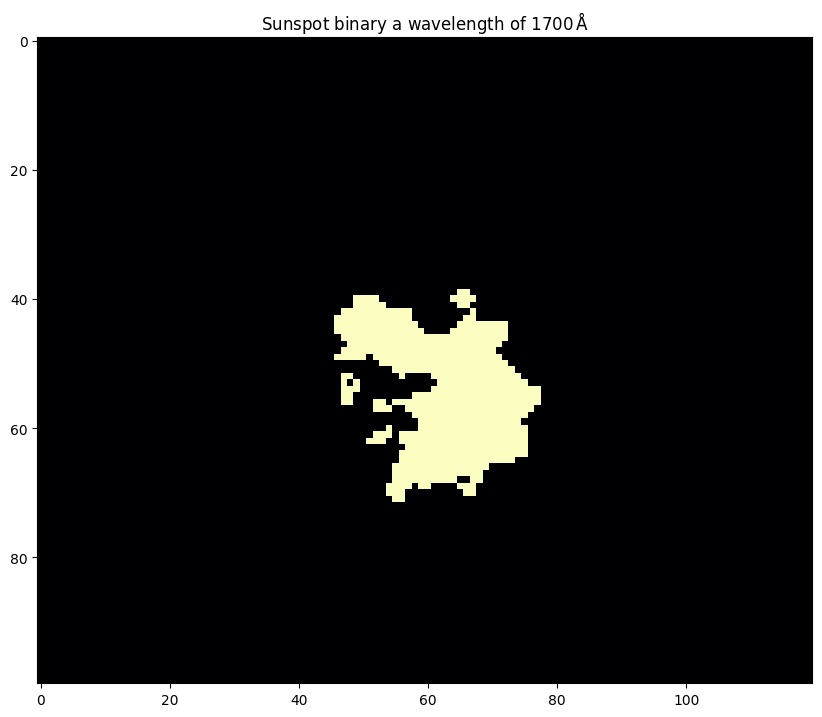

In [183]:
#Ploting to see and put limits 

plt.figure(figsize=(10, 10))

fig = plt.imshow(img_isolate_bin,  cmap = "magma")

plt.title(r"Sunspot binary a wavelength of $1700\,\rm Å$")
#plt.colorbar(fig, shrink = 0.7)
plt.show()

(h) Using your binary image, calculate the total area in pixel units covered by the sunspot, and estimate the sunspot radius also in pixel units assuming that its area is circular, i.e. $A_{\rm sunspot}=\pi\,r_{\rm sunspot}^2$.



In [184]:
#Calculate the area

area_pix = np.sum(img_isolate_bin)

#Get the radious 

r_pix = np.sqrt(area_pix/np.pi)

#print(np.unique(img_isolate_bin))
#print(area_pix)

In [185]:
print(f"The sunspot area (in pixels) is: {area_pix}")
print(f"The sunspot radious (in pixels) is: {r_pix}")

The sunspot area (in pixels) is: 562
The sunspot radious (in pixels) is: 13.374982468597496


(i) Now you need to calculate the sunspot radius in physical units ($\rm km$). To do this, you first need to read from the FITS file the header information on the angular size of a pixel in the image (called "CDELT1" in units of $\rm arcsec$). Use the header object returned in (c) and isolate the value of "CDELT1" from it. Then, convert it to a physical size (in $\rm km$) using the Earth-Sun distance of $1.496\times 10^8\,\rm km$ and trigonometry.

In [186]:
#Extract the pixel size
pixel_size = header["CDELT1"] #in arcsec

#Convert arcsec to rad 

pixel_size_rad = pixel_size*(np.pi/(180*3600))

D_sun= 1.493e8 #Sun distance in km

pixel_size_km = D_sun*np.tan(pixel_size_rad)

#print(pixel_size_km)
print(f"The pixel size in km is: {'%.3f' % pixel_size_km}")

The pixel size in km is: 434.296



(j) Use the calculated value of "CDELT1" (in $\rm km$) to estimate the sunspot radius in $\rm km$. Based on your results, are sunspots larger or smaller than the Earth? For reference, the Earth radius is $6.37\times 10^3\,\rm km$.

In [187]:
#Sunspot radious in km 

r_km = r_pix*pixel_size_km

print(f"The sunspot radious in [km] is: {'%.3e' %r_km}")

The sunspot radious in [km] is: 5.809e+03


The radious of the sunspot choosen is bigger than the Earth radious

In [188]:
#Check how the radious calculated asjust to sunspot by plotting

th = np.arange(0., 3*np.pi, 0.1)

x = r_pix*np.cos(th)
y = r_pix*np.sin(th)

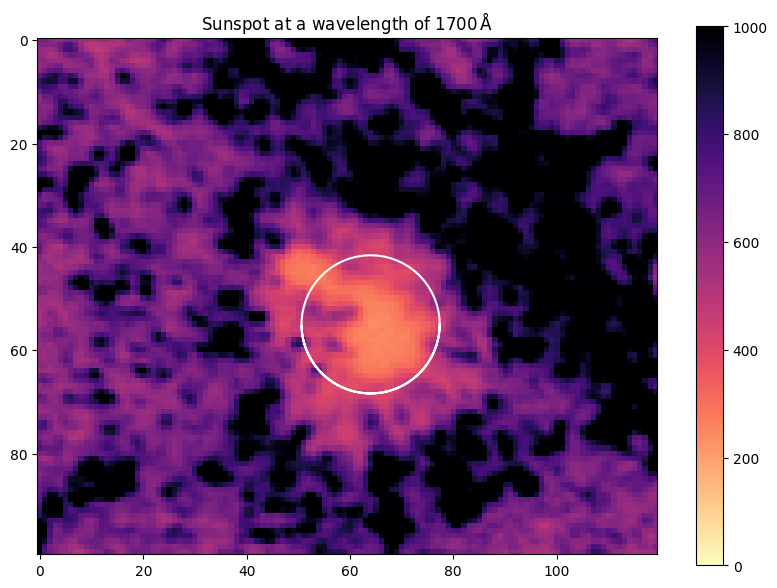

In [189]:
#Ploting to see and put limits 

plt.figure(figsize=(10, 10))

fig = plt.imshow(img_isolate,  cmap = "magma_r", vmin = 0.0, vmax = 1000.)
plt.plot(64. + x, 55. + y, color = "white")

plt.title(r"Sunspot at a wavelength of $1700\,\rm Å$")
plt.colorbar(fig, shrink = 0.7)
plt.show()